# Living

This notebook explores the living situation in Finnish postal code areas. We quickly overview the data, process it slightly, and try some basic dimension reduction techniques on it. Finally, we save it for future use.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
from ydata_profiling import ProfileReport

from utils import normalize_by_population

%matplotlib inline
sns.set_theme()

Notice that we are using the pre-cleaned dataset that was processed and saved in `education.ipynb`

In [2]:
ROOT = Path(".").absolute().parent
DATA = ROOT / "data"
df = pd.read_csv(DATA / "paavo_preclean.csv", dtype={"postcode": str})
df.head()

,postcode,name,municipality,X coordinate,Y coordinate,Surface area,"Inhabitants, total (HE)",Males (HE),Females (HE),Average age of inhabitants (HE),...,Primary production (TP),Processing (TP),Services (TP),"Inhabitants, total (PT)",Employed (PT),Unemployed (PT),Children aged 0 to 14 (PT),Students (PT),Pensioners (PT),Others (PT)
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,384979,6672361,2353278,18030,8492.0,9538.0,42.0,...,25.0,2461.0,52918.0,18030,9979.0,630.0,1656.0,1559.0,3437.0,769.0
1,00120,Punavuori - Bulevardi,Helsinki,385531,6671434,414010,7192,3339.0,3853.0,41.0,...,3.0,209.0,7880.0,7192,4018.0,254.0,800.0,517.0,1242.0,361.0
2,00130,Kaartinkaupunki,Helsinki,386244,6671474,428960,1731,851.0,880.0,42.0,...,14.0,396.0,13475.0,1731,938.0,47.0,196.0,142.0,297.0,111.0
3,00140,Kaivopuisto - Ullanlinna,Helsinki,386394,6670766,931841,7729,3524.0,4205.0,43.0,...,8.0,151.0,2584.0,7729,4028.0,275.0,893.0,556.0,1565.0,412.0
4,00150,Punavuori - Eira - Hernesaari,Helsinki,385320,6670373,1367328,9239,4269.0,4970.0,42.0,...,4.0,742.0,3777.0,9239,5230.0,407.0,928.0,636.0,1577.0,461.0


Living situations and buildling data are found in the `TE` and `RA`-columns

In [3]:
id_cols = ["postcode", "name", "municipality"]
cols = df.columns
living = df[cols[cols.str.contains("(TE)|(RA)")]]
living = pd.concat([df[id_cols], living], axis=1)
living.head()

/var/folders/f7/gwt6vghj60q4ss2pcpx8pqz00000gn/T/ipykernel_37483/3161944382.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  living = df[cols[cols.str.contains("(TE)|(RA)")]]


,postcode,name,municipality,"Households, total (TE)",Average size of households (TE),Average floor area per person (TE),One-person households (TE),Young one-person households (TE),Young couples without children (TE),Households with children (TE),...,Households living in other dwellings (TE),Free-time residences (RA),"Buildings, total (RA)",Other buildings (RA),Residential buildings (RA),Dwellings (RA),Average floor area per dwelling (RA),Dwellings in small houses (RA),Dwellings in blocks of flats (RA),Other dwellings (RA)
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,10280,1.7,39.7,5447.0,2330.0,816.0,1296.0,...,51.0,0,623,307,316,12337.0,65.7,3.0,11719.0,615.0
1,00120,Punavuori - Bulevardi,Helsinki,4072,1.8,40.1,2086.0,854.0,351.0,616.0,...,34.0,0,245,93,152,4862.0,69.8,7.0,4591.0,264.0
2,00130,Kaartinkaupunki,Helsinki,927,1.9,44.2,417.0,153.0,66.0,158.0,...,8.0,0,143,106,37,1181.0,79.2,0.0,999.0,182.0
3,00140,Kaivopuisto - Ullanlinna,Helsinki,4399,1.8,42.5,2289.0,828.0,298.0,653.0,...,37.0,0,232,60,172,5386.0,74.4,9.0,5353.0,24.0
4,00150,Punavuori - Eira - Hernesaari,Helsinki,5747,1.6,35.4,3482.0,1548.0,426.0,691.0,...,51.0,2,358,90,268,6763.0,56.2,28.0,6688.0,47.0


These columns could be renamed for better readability

In [4]:
living_colnames_to = list(living.columns)
clean_up_dict = {
    " (TE)": "",
	" (RA)": "",
	",": "",
	"_total": "",
    "-": "_",
    " ": "_",
	"Households_with_": "with_",
	"Households_living_": "living_"
}
for old, new in clean_up_dict.items():
    living_colnames_to = [s.replace(old, new) for s in living_colnames_to]
living_colnames_to = [s.lower() for s in living_colnames_to]

living.columns = living_colnames_to
living.head()

,postcode,name,municipality,households_total,average_size_of_households,average_floor_area_per_person,one_person_households,young_one_person_households,young_couples_without_children,with_children,...,living_in_other_dwellings,free_time_residences,buildings_total,other_buildings,residential_buildings,dwellings,average_floor_area_per_dwelling,dwellings_in_small_houses,dwellings_in_blocks_of_flats,other_dwellings
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,10280,1.7,39.7,5447.0,2330.0,816.0,1296.0,...,51.0,0,623,307,316,12337.0,65.7,3.0,11719.0,615.0
1,00120,Punavuori - Bulevardi,Helsinki,4072,1.8,40.1,2086.0,854.0,351.0,616.0,...,34.0,0,245,93,152,4862.0,69.8,7.0,4591.0,264.0
2,00130,Kaartinkaupunki,Helsinki,927,1.9,44.2,417.0,153.0,66.0,158.0,...,8.0,0,143,106,37,1181.0,79.2,0.0,999.0,182.0
3,00140,Kaivopuisto - Ullanlinna,Helsinki,4399,1.8,42.5,2289.0,828.0,298.0,653.0,...,37.0,0,232,60,172,5386.0,74.4,9.0,5353.0,24.0
4,00150,Punavuori - Eira - Hernesaari,Helsinki,5747,1.6,35.4,3482.0,1548.0,426.0,691.0,...,51.0,2,358,90,268,6763.0,56.2,28.0,6688.0,47.0


In [5]:
list(living.columns)

['postcode',
 'name',
 'municipality',
 'households_total',
 'average_size_of_households',
 'average_floor_area_per_person',
 'one_person_households',
 'young_one_person_households',
 'young_couples_without_children',
 'with_children',
 'with_small_children',
 'with_children_under_school_age',
 'with_school_age_children',
 'with_teenagers',
 'one_parent_households_with_children',
 'adult_households',
 'pensioner_households',
 'living_in_owner_occupied_dwellings',
 'living_in_rented_dwellings',
 'living_in_other_dwellings',
 'free_time_residences',
 'buildings_total',
 'other_buildings',
 'residential_buildings',
 'dwellings',
 'average_floor_area_per_dwelling',
 'dwellings_in_small_houses',
 'dwellings_in_blocks_of_flats',
 'other_dwellings']

Here we can immediately see that there are some overlap between columns
- There is floor area per person and per dwelling --> prioritize per person

In [6]:
living = living.drop(columns=["average_floor_area_per_dwelling"])

- also there are a lot of columns that are kind of similar to each other (e.g. buildings vs dwellings, livingform classes).

Im not exactly sure what is the exact difference between buildings and dwellings. Lets take a look at the data

In [7]:
living[[*id_cols, *list(living.columns)[-7:]]].head()

,postcode,name,municipality,buildings_total,other_buildings,residential_buildings,dwellings,dwellings_in_small_houses,dwellings_in_blocks_of_flats,other_dwellings
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,623,307,316,12337.0,3.0,11719.0,615.0
1,00120,Punavuori - Bulevardi,Helsinki,245,93,152,4862.0,7.0,4591.0,264.0
2,00130,Kaartinkaupunki,Helsinki,143,106,37,1181.0,0.0,999.0,182.0
3,00140,Kaivopuisto - Ullanlinna,Helsinki,232,60,172,5386.0,9.0,5353.0,24.0
4,00150,Punavuori - Eira - Hernesaari,Helsinki,358,90,268,6763.0,28.0,6688.0,47.0


- `buildings_total` is the sum of `other_buildings` and `residential_buildings`
- `dwellings`is the sum of `dwellings_in_small_houses`, `dwellings_in_blocks_of_flats`, `other_dwellings`

When I think about what characterizes living in a certain area, I am not actually that interested in the absolute volume of buildings or dwellings in the area. The factors that I am more interested about are 
- Building types in the area: e.g. are there more apartment buildings, etc --> is a signal of urbanization
- Dwelling/population ratio: is it difficult to find housing in the area? Is the area "overpopulated"?
	- However, this is also already calculated with the `households` information, so it is not relevant.
- Living demographics: what kind of people live in the area? what type of family structure?

Therefore I could actually delete the `buildings`-columns. They are more suitable for other types of area analysis, such as building of industrial buildings, etc. I could keep the property type structure, however, by taking the area-wise ratios of each dwelling type

In [8]:
living["small_houses_ratio"] = living["dwellings_in_small_houses"] / living["dwellings"]
living["apartments_ratio"] = living["dwellings_in_blocks_of_flats"] / living["dwellings"]
living["other_ratio"] = living["other_dwellings"] / living["dwellings"]
living.head()

,postcode,name,municipality,households_total,average_size_of_households,average_floor_area_per_person,one_person_households,young_one_person_households,young_couples_without_children,with_children,...,buildings_total,other_buildings,residential_buildings,dwellings,dwellings_in_small_houses,dwellings_in_blocks_of_flats,other_dwellings,small_houses_ratio,apartments_ratio,other_ratio
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,10280,1.7,39.7,5447.0,2330.0,816.0,1296.0,...,623,307,316,12337.0,3.0,11719.0,615.0,0.000243,0.949907,0.049850
1,00120,Punavuori - Bulevardi,Helsinki,4072,1.8,40.1,2086.0,854.0,351.0,616.0,...,245,93,152,4862.0,7.0,4591.0,264.0,0.001440,0.944262,0.054299
2,00130,Kaartinkaupunki,Helsinki,927,1.9,44.2,417.0,153.0,66.0,158.0,...,143,106,37,1181.0,0.0,999.0,182.0,0.000000,0.845893,0.154107
3,00140,Kaivopuisto - Ullanlinna,Helsinki,4399,1.8,42.5,2289.0,828.0,298.0,653.0,...,232,60,172,5386.0,9.0,5353.0,24.0,0.001671,0.993873,0.004456
4,00150,Punavuori - Eira - Hernesaari,Helsinki,5747,1.6,35.4,3482.0,1548.0,426.0,691.0,...,358,90,268,6763.0,28.0,6688.0,47.0,0.004140,0.988910,0.006950


In [9]:
drop = [
	"buildings_total",
	"other_buildings",
	"residential_buildings",
	"dwellings",
	"dwellings_in_small_houses",
	"dwellings_in_blocks_of_flats",
	"other_dwellings",
    "other_ratio"
]
living = living.drop(columns=drop)
living.head()

,postcode,name,municipality,households_total,average_size_of_households,average_floor_area_per_person,one_person_households,young_one_person_households,young_couples_without_children,with_children,...,with_teenagers,one_parent_households_with_children,adult_households,pensioner_households,living_in_owner_occupied_dwellings,living_in_rented_dwellings,living_in_other_dwellings,free_time_residences,small_houses_ratio,apartments_ratio
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,10280,1.7,39.7,5447.0,2330.0,816.0,1296.0,...,476.0,257.0,6563.0,2447.0,4895.0,5334.0,51.0,0,0.000243,0.949907
1,00120,Punavuori - Bulevardi,Helsinki,4072,1.8,40.1,2086.0,854.0,351.0,616.0,...,232.0,157.0,2532.0,938.0,2101.0,1937.0,34.0,0,0.001440,0.944262
2,00130,Kaartinkaupunki,Helsinki,927,1.9,44.2,417.0,153.0,66.0,158.0,...,67.0,37.0,545.0,232.0,458.0,461.0,8.0,0,0.000000,0.845893
3,00140,Kaivopuisto - Ullanlinna,Helsinki,4399,1.8,42.5,2289.0,828.0,298.0,653.0,...,218.0,149.0,2583.0,1180.0,2300.0,2062.0,37.0,0,0.001671,0.993873
4,00150,Punavuori - Eira - Hernesaari,Helsinki,5747,1.6,35.4,3482.0,1548.0,426.0,691.0,...,210.0,165.0,3869.0,1203.0,2866.0,2830.0,51.0,2,0.004140,0.988910


### Family structure

The family structure columns are shown below

In [10]:
family_cols = [
    'one_person_households',
    'young_one_person_households',
    'young_couples_without_children',
    'with_children',
    'with_small_children',
    'with_children_under_school_age',
    'with_school_age_children',
    'with_teenagers',
    'one_parent_households_with_children',
    'adult_households',
    'pensioner_households',
]

In [11]:
living[[*id_cols, "households_total", *family_cols]].head()

,postcode,name,municipality,households_total,one_person_households,young_one_person_households,young_couples_without_children,with_children,with_small_children,with_children_under_school_age,with_school_age_children,with_teenagers,one_parent_households_with_children,adult_households,pensioner_households
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,10280,5447.0,2330.0,816.0,1296.0,328.0,561.0,554.0,476.0,257.0,6563.0,2447.0
1,00120,Punavuori - Bulevardi,Helsinki,4072,2086.0,854.0,351.0,616.0,134.0,256.0,262.0,232.0,157.0,2532.0,938.0
2,00130,Kaartinkaupunki,Helsinki,927,417.0,153.0,66.0,158.0,45.0,66.0,57.0,67.0,37.0,545.0,232.0
3,00140,Kaivopuisto - Ullanlinna,Helsinki,4399,2289.0,828.0,298.0,653.0,151.0,292.0,295.0,218.0,149.0,2583.0,1180.0
4,00150,Punavuori - Eira - Hernesaari,Helsinki,5747,3482.0,1548.0,426.0,691.0,164.0,315.0,306.0,210.0,165.0,3869.0,1203.0


It seems that actually these columns are sometimes subsets of each other - for example, young one person households is a subset of one person households. This is not necessary for overall analysis of a postal area, and we should consider how we could combine them. Unfortunately, there is no single truth of what family types you should follow, so I need to decide what are relevant features myself. Personally, I would start off by discarding very specific subset features, such as small-children families, etc. This is because they represent a too specific of a feature and is not a relevant indicator of the demographics of the area as a whole.

Out of the columns, I think that I will choose to keep 
- One person households
- With children
- Pensioner households

This gives a wide range of different population characteristics: how many families move here, if its inhabited by older people, or by singles.

In [12]:
drop = set(family_cols) - {"one_person_households", "with_children", "pensioner_households"}
living = living.drop(columns=drop)
living.head()

,postcode,name,municipality,households_total,average_size_of_households,average_floor_area_per_person,one_person_households,with_children,pensioner_households,living_in_owner_occupied_dwellings,living_in_rented_dwellings,living_in_other_dwellings,free_time_residences,small_houses_ratio,apartments_ratio
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,10280,1.7,39.7,5447.0,1296.0,2447.0,4895.0,5334.0,51.0,0,0.000243,0.949907
1,00120,Punavuori - Bulevardi,Helsinki,4072,1.8,40.1,2086.0,616.0,938.0,2101.0,1937.0,34.0,0,0.001440,0.944262
2,00130,Kaartinkaupunki,Helsinki,927,1.9,44.2,417.0,158.0,232.0,458.0,461.0,8.0,0,0.000000,0.845893
3,00140,Kaivopuisto - Ullanlinna,Helsinki,4399,1.8,42.5,2289.0,653.0,1180.0,2300.0,2062.0,37.0,0,0.001671,0.993873
4,00150,Punavuori - Eira - Hernesaari,Helsinki,5747,1.6,35.4,3482.0,691.0,1203.0,2866.0,2830.0,51.0,2,0.004140,0.988910


Lets also normalize these values for them to be comparable

In [13]:
norm_cols = ["one_person_households", "with_children", "pensioner_households"]
living[norm_cols] = living[norm_cols].div(living["households_total"], axis=0)
living.head()

,postcode,name,municipality,households_total,average_size_of_households,average_floor_area_per_person,one_person_households,with_children,pensioner_households,living_in_owner_occupied_dwellings,living_in_rented_dwellings,living_in_other_dwellings,free_time_residences,small_houses_ratio,apartments_ratio
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,10280,1.7,39.7,0.529864,0.126070,0.238035,4895.0,5334.0,51.0,0,0.000243,0.949907
1,00120,Punavuori - Bulevardi,Helsinki,4072,1.8,40.1,0.512279,0.151277,0.230354,2101.0,1937.0,34.0,0,0.001440,0.944262
2,00130,Kaartinkaupunki,Helsinki,927,1.9,44.2,0.449838,0.170442,0.250270,458.0,461.0,8.0,0,0.000000,0.845893
3,00140,Kaivopuisto - Ullanlinna,Helsinki,4399,1.8,42.5,0.520346,0.148443,0.268243,2300.0,2062.0,37.0,0,0.001671,0.993873
4,00150,Punavuori - Eira - Hernesaari,Helsinki,5747,1.6,35.4,0.605881,0.120237,0.209327,2866.0,2830.0,51.0,2,0.004140,0.988910


Next, lets do something to the `_dwellings` columns. The rented and occupied are interesting, but I could discard `other`, as it is marginal information. I will take a ratio value of each dwelling type:

In [14]:
living = living.drop(columns="living_in_other_dwellings")
living = living.rename(columns={
    "living_in_owner_occupied_dwellings": "owner_occupied",
    "living_in_rented_dwellings": "rented"
	}
)
living[["owner_occupied", "rented"]] = living[["owner_occupied", "rented"]].div(living["households_total"], axis=0)
living.head()

,postcode,name,municipality,households_total,average_size_of_households,average_floor_area_per_person,one_person_households,with_children,pensioner_households,owner_occupied,rented,free_time_residences,small_houses_ratio,apartments_ratio
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,10280,1.7,39.7,0.529864,0.126070,0.238035,0.476167,0.518872,0,0.000243,0.949907
1,00120,Punavuori - Bulevardi,Helsinki,4072,1.8,40.1,0.512279,0.151277,0.230354,0.515963,0.475688,0,0.001440,0.944262
2,00130,Kaartinkaupunki,Helsinki,927,1.9,44.2,0.449838,0.170442,0.250270,0.494067,0.497303,0,0.000000,0.845893
3,00140,Kaivopuisto - Ullanlinna,Helsinki,4399,1.8,42.5,0.520346,0.148443,0.268243,0.522846,0.468743,0,0.001671,0.993873
4,00150,Punavuori - Eira - Hernesaari,Helsinki,5747,1.6,35.4,0.605881,0.120237,0.209327,0.498695,0.492431,2,0.004140,0.988910


Finally lets drop free-time residences, total households, and do a profile report. Note that I'm using the Spearman Rank correlation, since I am not guaranteed about the normal distribution assumption of the measured features.

In [15]:
living = living.drop(columns=["free_time_residences", "households_total"])

In [16]:
profile = ProfileReport(
    living.set_index(id_cols),
    title="Living situation demographics profile report",
    correlations={
        "pearson": {"calculate": False},
        "spearman": {"calculate": True},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": False},
        "cramers": {"calculate": False},
    }
)
profile.to_file("profile_reports/paavo_living_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

### Observations from the ProfileReport

There is a lot of collinearity between some of the variables. Most of them are simply due to them being "composite" features generated from the some number, such as apartments vs small houses as a division of total number of households in an area. The other observations, however, are interesting and are mentioned here.
- Shares of owner-occupied households are negatively correlated with shares of apartment dwellings and one-person households.
	- This might suggest that people who buy dwellings instead of renting could tend to avoid apartment, buildings, favoring buying a larger house together with someone, forming a family. 
	- Conversely, there was some positive (although not strong) correlation for small separate housing and higher floor area per person.
	- In a way, this represents the classic ideal of ["move out, buy a hountry house, get two children and a dog"](https://www.vauva.fi/keskustelu/2424026/halutaanko_enaa_omaa_omakotitaloa_koiraa_autoa_ja_kaksi_lasta), although inferencial conclusions about this should not be made.
- There is high (~0.8) correlation between shares of apartments and rented households. 
	- This is a supplementary association observation to the idea above that apartment buildings tend to be rented more likely than bought.
- One-person household ratio was very negatively correlated with average floor area per person. 
	- This makes sense, since usually single-living people tend to buy smaller dwellings, both because there is less need for living area, but also because they most likely have a budget that limits their choices of buying a bigger house.
	- Note that the opposite is true for households with children, as they have a positive correlation between them
- The size of the house has very high negative correlation with ratio of one-person households, and very high positive correlation with the number of children in the household.
	- This shows that these features are very highly associated with each other, or at least ae mechanistically related to one other.
	- Intuitively, this makes sense, since, usually people living alone do not need as much living space. On the other side, with the arrival of children, there is often need to get a larger house for living, as both the parents and the children need sufficient living space for fulfilling their own needs. One could even argue that the number of people living in the household is one of the main drivers of housing size, although only based on this finding, I would not say that. You would need to consider other factors such as wealth, housing prices, and personal needs.


In general, I would say that this would be a perfect opportunity to test out PCA/etc for dimension reduction. I suspect that with this high collinearity we could find a couple of nice components to represent these features and make the dimension space of the dataset smaller. However, I will leave this to when I have all of the cleaned up data together in one place, as I can then apply dimension reduction to all of the data at the same time.


#### Skew of aparment shares

Most of the features are approximately normally distributed, except for the shares of apartment buildings (and by extension, small housing), which is very heavily skewed to the right. Since there is a small number of postal code areas with a large share of apartments, and the fact that I know that cities tend to favor apartment bulidings to do housing cost, I hypothesize, that high shares of apartment buildings, rented housing, and single-person living will be found mostly in large cities.

In [ ]:
# Top 5 cities by population
top_cities = [
    "Helsinki",
    "Espoo",
    "Vantaa",
    "Tampere",
    "Oulu",
]
liv = living.copy()
liv["is_big_city"] = liv["municipality"].isin(top_cities)
liv.head()

,postcode,name,municipality,average_size_of_households,average_floor_area_per_person,one_person_households,with_children,pensioner_households,owner_occupied,rented,small_houses_ratio,apartments_ratio,is_big_city
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,1.7,39.7,0.529864,0.126070,0.238035,0.476167,0.518872,0.000243,0.949907,True
1,00120,Punavuori - Bulevardi,Helsinki,1.8,40.1,0.512279,0.151277,0.230354,0.515963,0.475688,0.001440,0.944262,True
2,00130,Kaartinkaupunki,Helsinki,1.9,44.2,0.449838,0.170442,0.250270,0.494067,0.497303,0.000000,0.845893,True
3,00140,Kaivopuisto - Ullanlinna,Helsinki,1.8,42.5,0.520346,0.148443,0.268243,0.522846,0.468743,0.001671,0.993873,True
4,00150,Punavuori - Eira - Hernesaari,Helsinki,1.6,35.4,0.605881,0.120237,0.209327,0.498695,0.492431,0.004140,0.988910,True


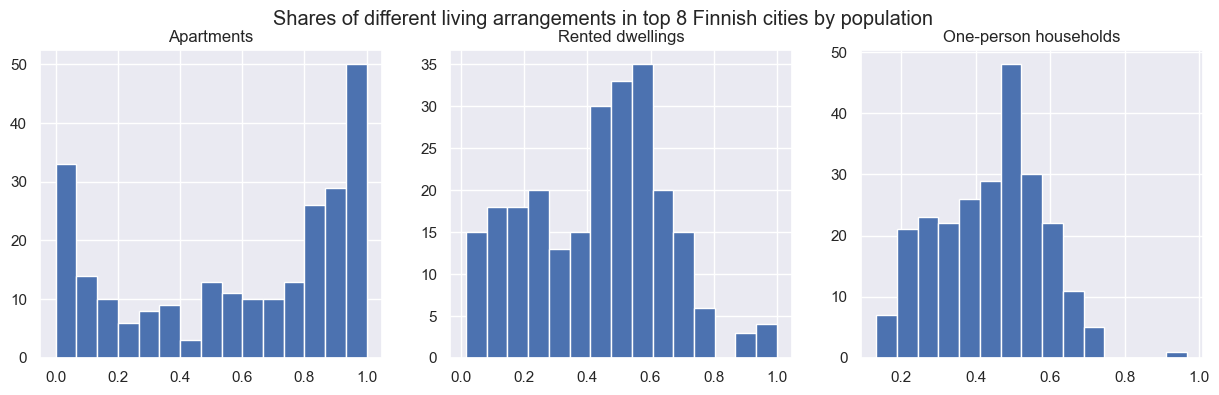

In [ ]:
# Histograms of apartments ratio, rented and one person households for data in top 8 cities
top_data = liv[liv["is_big_city"]]
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

plt.suptitle("Shares of different living arrangements in top 8 Finnish cities by population")

top_data["apartments_ratio"].hist(bins=15, ax=ax[0])
ax[0].set_title("Apartments")

top_data["rented"].hist(bins=15, ax=ax[1])
ax[1].set_title("Rented dwellings")

top_data["one_person_households"].hist(bins=15, ax=ax[2])
ax[2].set_title("One-person households")

plt.show()


We can see that actually my hypothesis is not exactly true based on this data. Although the top cities tend to have more of the high shares of apartment buildings of Finland, the large cities also have many postal code areas with very little apartments. This reflects a similar causal discussion that I expressed when discussing education (`income_and_education.ipynb`), where there is some evidence but bidirectional inference is far from possible. One can say that if the share of apartments is high, it likely came from a big city, but if the postal code area is a big city, you cannot say if it will have a large apartment share or not. The same is true for the other explored features, as the distributions look approximately the same as with the non-filtered data.

Another factor that makes analysis of large cities more difficult is their heterogeneity - there are many diverse areas within a large municipality. For example, the urban wealth of central and southern Helsinki is vastly different from eastern and northern Helsinki, which is more industrialized and closer to the "traditional" countryside. Therefore, it is quite difficult to make any generalized analysis on bigger cities, as it is guaranteed that there will be distinct differences found between areas within a city itself.

In many ways, this actually reveals a logical bias in the way I treat the data. When I talk about "big cities" I actually mean the urbran city areas, such as central Helsinki, Turku, and Tampere. This includes areas such as Kamppi, Töölö and Punavuori in Helsinki or Tammela in Tampere. However, what I fail to realize is that in the data we talk about *municipalities*, not cities, which means a slightly different thing. Although not a part of the "city", areas can still be considered to be a part of a larger municipality for social welfare and resource allocation reasons. If I really want to execute city-vs-countryside comparison, I should manually identify which area is a part of the "real city" and which not. This is something that I do not have interest in doing, as it requires manual effort and brings subjective opinions into consideration where I dont need it. Further, I believe that the clustering analysis should anyways be able to identify and bring together more urbanized postal code areas.

With this, I think that I that I can say that I have explored living data sufficiently. Overall living data showed a lot of diversity, with a lot of difference between certain factors, and strong correlational relationships amongst them. I therefore believe that it is likely, that factors such as shares apartments and ownership shares will be something that will be useful in defining a particular are profile. 

Finally, lets save the data

In [ ]:
living.to_csv(DATA / "paavo_living_clean.csv", index=False)

---


### Labor

The rest (mainly labor) columns are from the `(TP)` and `(PT)` columns.

In [ ]:
labor = df[cols[cols.str.contains("(TP)|(PT)")]]
labor = pd.concat([df[id_cols], labor], axis=1)
labor.head()

/var/folders/f7/gwt6vghj60q4ss2pcpx8pqz00000gn/T/ipykernel_33909/388145401.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  labor = df[cols[cols.str.contains("(TP)|(PT)")]]


,postcode,name,municipality,"Workplaces, total (TP)",Primary production (TP),Processing (TP),Services (TP),"Inhabitants, total (PT)",Employed (PT),Unemployed (PT),Children aged 0 to 14 (PT),Students (PT),Pensioners (PT),Others (PT)
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,55404,25.0,2461.0,52918.0,18030,9979.0,630.0,1656.0,1559.0,3437.0,769.0
1,00120,Punavuori - Bulevardi,Helsinki,8092,3.0,209.0,7880.0,7192,4018.0,254.0,800.0,517.0,1242.0,361.0
2,00130,Kaartinkaupunki,Helsinki,13886,14.0,396.0,13475.0,1731,938.0,47.0,196.0,142.0,297.0,111.0
3,00140,Kaivopuisto - Ullanlinna,Helsinki,2744,8.0,151.0,2584.0,7729,4028.0,275.0,893.0,556.0,1565.0,412.0
4,00150,Punavuori - Eira - Hernesaari,Helsinki,4523,4.0,742.0,3777.0,9239,5230.0,407.0,928.0,636.0,1577.0,461.0


- Again, we have a column (workplaces) split into different themes. These individual ones are better --> lets use them and normalize by total number of workplaces
	- Lets also calculate the ratio of workplaces with the size of the workforce living in the area (population - children/pensioners/etc.). This gives us a rough figure of the "surplus" of available workplaces there is for in the area. 
		- In my mind, this shows potential for out-of-postal-code area inhabitants to move into the area to work, and hence improve local productivity and GDP
- Total inhabitants is duplicate from earlier population columns and should be eventually deleted
- Unemployment is more important than employment figures, as unemployment is often the figure that is used as a measure of economic "health" in the area --> delete extra column
- Production sectors should be normalized by total number of workplaces
- Age groups should be deleted as they are not necessary --> we already have cleaned up and saved population data.

In [ ]:
labor = labor.drop(columns=["Children aged 0 to 14 (PT)", "Students (PT)", "Pensioners (PT)", "Others (PT)"])
labor.head()

,postcode,name,municipality,"Workplaces, total (TP)",Primary production (TP),Processing (TP),Services (TP),"Inhabitants, total (PT)",Employed (PT),Unemployed (PT)
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,55404,25.0,2461.0,52918.0,18030,9979.0,630.0
1,00120,Punavuori - Bulevardi,Helsinki,8092,3.0,209.0,7880.0,7192,4018.0,254.0
2,00130,Kaartinkaupunki,Helsinki,13886,14.0,396.0,13475.0,1731,938.0,47.0
3,00140,Kaivopuisto - Ullanlinna,Helsinki,2744,8.0,151.0,2584.0,7729,4028.0,275.0
4,00150,Punavuori - Eira - Hernesaari,Helsinki,4523,4.0,742.0,3777.0,9239,5230.0,407.0


In [ ]:
colnames_to = list(labor.columns)
clean_up_dict = {
    " (TP)": "",
	" (PT)": "",
	", ": "_",
	"_total": "",
    " ": "_",
}
for old, new in clean_up_dict.items():
    colnames_to = [s.replace(old, new) for s in colnames_to]
colnames_to = [s.lower() for s in colnames_to]

labor.columns = colnames_to
labor.head()

,postcode,name,municipality,workplaces,primary_production,processing,services,inhabitants,employed,unemployed
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,55404,25.0,2461.0,52918.0,18030,9979.0,630.0
1,00120,Punavuori - Bulevardi,Helsinki,8092,3.0,209.0,7880.0,7192,4018.0,254.0
2,00130,Kaartinkaupunki,Helsinki,13886,14.0,396.0,13475.0,1731,938.0,47.0
3,00140,Kaivopuisto - Ullanlinna,Helsinki,2744,8.0,151.0,2584.0,7729,4028.0,275.0
4,00150,Punavuori - Eira - Hernesaari,Helsinki,4523,4.0,742.0,3777.0,9239,5230.0,407.0


In [ ]:
labor["workforce"] = labor["employed"] + labor["unemployed"]
labor = labor.drop(columns="employed")
labor

,postcode,name,municipality,workplaces,primary_production,processing,services,inhabitants,unemployed,workforce
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,55404,25.0,2461.0,52918.0,18030,630.0,10609.0
1,00120,Punavuori - Bulevardi,Helsinki,8092,3.0,209.0,7880.0,7192,254.0,4272.0
2,00130,Kaartinkaupunki,Helsinki,13886,14.0,396.0,13475.0,1731,47.0,985.0
3,00140,Kaivopuisto - Ullanlinna,Helsinki,2744,8.0,151.0,2584.0,7729,275.0,4303.0
4,00150,Punavuori - Eira - Hernesaari,Helsinki,4523,4.0,742.0,3777.0,9239,407.0,5637.0
...,...,...,...,...,...,...,...,...,...,...
2815,99910,Kaamanen-Partakko,Inari,33,1.0,3.0,29.0,142,8.0,52.0
2816,99930,Sevettij�rvi-N��t�m�,Inari,9,NaN,NaN,NaN,212,14.0,111.0
2817,99950,Karigasniemi,Utsjoki,68,4.0,2.0,62.0,294,15.0,130.0
2818,99980,Utsjoki Keskus,Utsjoki,241,10.0,15.0,216.0,667,23.0,290.0


In [ ]:
labor = normalize_by_population(labor, population_col="workplaces", skip_cols=id_cols + ["inhabitants", "unemployed", "workforce"])
labor.head()

,postcode,name,municipality,workplaces,primary_production,processing,services,inhabitants,unemployed,workforce
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,55404,0.000451,0.044419,0.955130,18030,630.0,10609.0
1,00120,Punavuori - Bulevardi,Helsinki,8092,0.000371,0.025828,0.973801,7192,254.0,4272.0
2,00130,Kaartinkaupunki,Helsinki,13886,0.001008,0.028518,0.970402,1731,47.0,985.0
3,00140,Kaivopuisto - Ullanlinna,Helsinki,2744,0.002915,0.055029,0.941691,7729,275.0,4303.0
4,00150,Punavuori - Eira - Hernesaari,Helsinki,4523,0.000884,0.164050,0.835065,9239,407.0,5637.0


In [ ]:
labor["workforce_to_workplaces"] = labor["workforce"] / labor["workplaces"]
labor["unemployment"] = labor["unemployed"] / labor["workforce"]
labor = labor.drop(columns=["inhabitants", "workforce", "workplaces", "unemployed"])
labor.head()

,postcode,name,municipality,primary_production,processing,services,workforce_to_workplaces,unemployment
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,0.000451,0.044419,0.955130,0.191484,0.059384
1,00120,Punavuori - Bulevardi,Helsinki,0.000371,0.025828,0.973801,0.527929,0.059457
2,00130,Kaartinkaupunki,Helsinki,0.001008,0.028518,0.970402,0.070935,0.047716
3,00140,Kaivopuisto - Ullanlinna,Helsinki,0.002915,0.055029,0.941691,1.568149,0.063909
4,00150,Punavuori - Eira - Hernesaari,Helsinki,0.000884,0.164050,0.835065,1.246297,0.072202


Now that we have the relevant data collected and cleaned, lets do some area data analysis:

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/rasmussiljander/self-learning/pcode_analysis_venv/lib/python3.10/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/rasmussiljander/self-learning/pcode_analysis_venv/lib/python3.10/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/rasmussiljander/self-learning/pcode_analysis_venv/lib/python3.10/site-packages/pandas/core/nanops.py:1344: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
/Users/rasmussiljander/self-learning/pcode_analysis_venv/lib/python3.10/site-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
/Users/rasmussiljander/self-learning/pcode_analysis_venv/lib/python3.10/site-packages/seaborn/matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produc

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

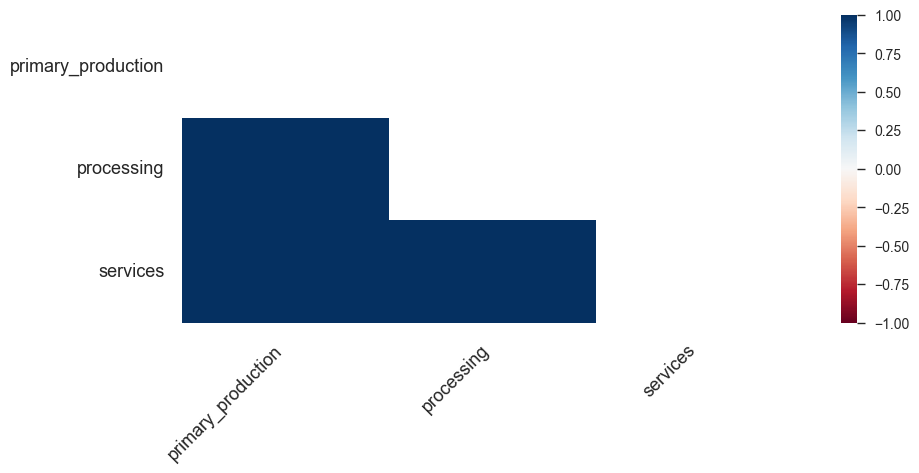

In [ ]:
profile = ProfileReport(
    labor.set_index(id_cols),
    title="Labor demographics profile report",
    correlations={"auto": {"calculate": False}},
    missing_diagrams={"Heatmap": False}
    # correlations={
    #     "pearson": {"calculate": False},
    #     "spearman": {"calculate": True},
    #     "kendall": {"calculate": False},
    #     "phi_k": {"calculate": False},
    #     "cramers": {"calculate": False},
    # }
)
profile.to_file("profile_reports/paavo_labor_report.html")

### Observations

1. There were some infinities that slipped into workplaces/workforce ratio, probably because there are areas with no workplaces
2. There are a lot of zeros and missing data in the sectors data. 
3. Unemployment seems visually like an almost perfect normal distribution, with the exception that it has a vanishing tail towards 0.5.

Lets tackle these issues one-by-one

#### 1. Infinities

These we can just reassign as nulls

In [ ]:
labor.loc[labor["workforce_to_workplaces"] == np.Inf, "workforce_to_workplaces"] = np.nan
labor["workforce_to_workplaces"].mean().round(2)

3.31

And now plot

(-4.0, 4.0)

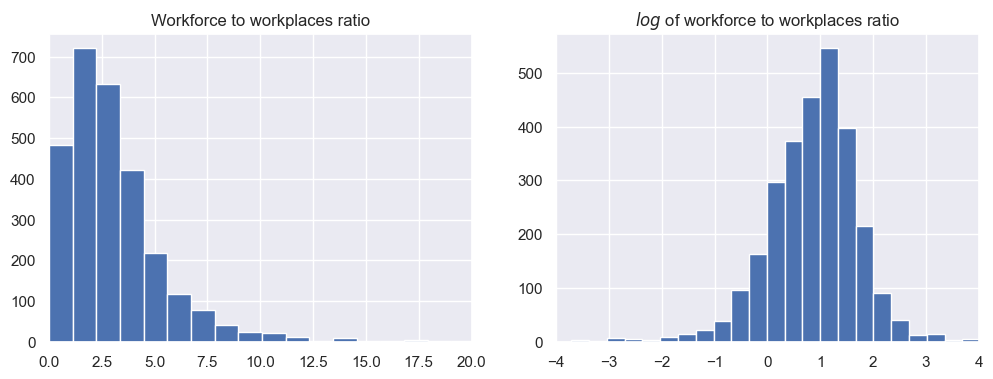

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,4))

labor["workforce_to_workplaces"].hist(bins=50, ax=axs[0])
axs[0].set_title("Workforce to workplaces ratio")
axs[0].set_xlim((0, 20))

np.log(labor["workforce_to_workplaces"]).hist(bins=30, ax=axs[1])
axs[1].set_title("$log$ of workforce to workplaces ratio")
axs[1].set_xlim((-4, 4))

The share seems to be **maybe** log-normally distributed, with a log-normal mean centered around 1. The median of 3.31 suggests that on "average", postalcodes have almost three times as much workforce than available workplaces. To be honest, I'm not exactly sure how to interpret this result. On one hand, this would be very alarming, suggesting that there are not enough jobs available for all people in the area. On the other hand, there is pretty much no correlation between unemployment and this ratio, showing that large "overflows" of workforce doesn't tend to translate into unemployment. Further, knowing that many people commute across postal code areas, it makes sense that a people can find employment even if there are not enough similar ones available in their area. The one feature that this value has some correlation with is the amount of primary sector production done in the area, although that correlation is also somewhat weak. 

Hence, it is simply more likely that this figure is simply a descriptive of the area - a high value suggests that perhaps inhabitants commute somewhere else to work, and conversely a small value could indicate of a large working hub. There could be serveral possible explanations for this. 
- For example, the postal code area could be a suburb or residential district having not many available jobs, forcing people to commute a little for work. This could lead to a higher ratio of workforce to workplaces.
- On the other hand, industrial areas could have little places to live in, but have a lot of workplaces, leading to a smaller share of workforce to workplaces
- etc.

There are many different scenarios that one could come up with that *could* explain these figures, but without more detailed knowledge, closer inference is not really that possible. For example, for postal code `00290` we can see that the hospital area of Meilahti has a very high ratio of services, with really no other sector present. Here, this ratio figure is very small, 0.005. For this area, this value makes sense, since hospital areas usually dont have housing to live in, but hospitals do require a large workforce to ensure that the health care system continues running. For examples like this, closer explanation is possible, but for many areas we unfortunately do not have such contextual information available.


#### 2. Zeros in production

Next, lets look at the zeros in the sector data

In [ ]:
labor[labor["processing"] == 0]
labor[labor["services"] == 0]
labor[labor["primary_production"] == 0]

,postcode,name,municipality,primary_production,processing,services,workforce_to_workplaces,unemployment
11,00220,J�tk�saari,Helsinki,0.0,0.032951,0.967049,3.074021,0.068199
17,00290,Meilahden sairaala-alue,Helsinki,0.0,0.002205,0.997795,0.005930,0.051282
24,00360,Pajam�ki,Helsinki,0.0,0.138889,0.861111,14.805556,0.093809
26,00380,Pit�j�nm�en yritysalue,Helsinki,0.0,0.305659,0.694341,0.142154,0.116296
27,00390,Konala,Helsinki,0.0,0.226188,0.773812,0.585011,0.108733
...,...,...,...,...,...,...,...,...
2691,96960,Someroharju,Rovaniemi,0.0,0.051282,0.948718,0.263736,0.083333
2712,97580,Misi,Rovaniemi,0.0,0.000000,1.000000,2.000000,0.291667
2752,98440,Kallaanvaara,Kemij�rvi,0.0,0.842105,0.157895,2.719298,0.132258
2791,99450,Palojoensuu-Kuttanen,Enonteki�,0.0,0.000000,1.000000,1.700000,0.088235


It seems that this is simply a feature of the data - some places just don't have any primary production. This makes sense, since usually primary production plants are concentrated around closer to the resource, and hence not.

#### 3. Unemployment

The shape of the unemployment histogram is interesting, as mentioned above it looks quite uniform apart from a long tail towards high unemployment. The tail is almost as if most of the postal code areas fit the general population distribution, with some areas failing and getting a lot higher unemployment than they should. The highest value is 0.45, which seems extremely high --> almost half of the people living in the area are unemployed. Overall, the postal code area average/median unemployment is 9.7% / 8.8%, which is higher than the [Global](https://www.statista.com/statistics/279777/global-unemployment-rate/) and [EU](https://ec.europa.eu/eurostat/web/products-euro-indicators/w/3-01032024-bp) average. However, it is very likely that I made some small calculation errors in calculating the unemployment rates, as I manually normalized it by postal code area. 
However, at the end this should be okay since the "error" should be constant across all areas, and hence not affect modeling that much. As a side note, the Finnish unemployment value seems to be [around 7.7%](https://stat.fi/julkaisu/clmhqnhxn0meq0bvxultmarty), indicating that after all, I could maybe review how I calculate these values, perhaps from the Tilastokeskus websites.

Lets see what are the areas with the lowest and highest unemployment numbers.

In [ ]:
sorted = labor.sort_values("unemployment")
top_and_bottom = pd.concat([sorted.head(5), sorted.tail(5)])
df[df["name"].isin(top_and_bottom["name"])]

,postcode,name,municipality,X coordinate,Y coordinate,Surface area,"Inhabitants, total (HE)",Males (HE),Females (HE),Average age of inhabitants (HE),...,Primary production (TP),Processing (TP),Services (TP),"Inhabitants, total (PT)",Employed (PT),Unemployed (PT),Children aged 0 to 14 (PT),Students (PT),Pensioners (PT),Others (PT)
524,17740,Kasiniemi-Torittu,Padasjoki,389118,6811700,45200878,46,25.0,21.0,68.0,...,NaN,NaN,NaN,46,9.0,5.0,0.0,1.0,30.0,1.0
678,22830,Enklinge,Kumlinge,156040,6705992,13266733,68,37.0,31.0,54.0,...,NaN,NaN,NaN,68,24.0,0.0,7.0,4.0,32.0,1.0
680,22910,Torsholma,Br�nd�,173209,6705256,6601364,72,34.0,38.0,44.0,...,NaN,NaN,NaN,72,48.0,0.0,4.0,6.0,14.0,0.0
682,22940,�va,Br�nd�,174449,6717371,11813296,98,53.0,45.0,47.0,...,27.0,1.0,27.0,98,47.0,0.0,16.0,7.0,26.0,2.0
755,25940,Hiittinen,Kimito�n,248167,6647455,14989886,57,29.0,28.0,59.0,...,0.0,3.0,22.0,57,14.0,0.0,7.0,1.0,32.0,3.0
1457,51780,Kuosmala,Juva,538641,6845271,73035182,117,68.0,49.0,54.0,...,10.0,0.0,0.0,117,46.0,0.0,10.0,6.0,51.0,4.0
2299,82760,Hoilola,Joensuu,699937,6915983,64947439,72,33.0,39.0,66.0,...,NaN,NaN,NaN,72,11.0,9.0,2.0,0.0,48.0,2.0
2308,82980,M�hk�,Ilomantsi,719704,6951364,162602298,72,38.0,34.0,62.0,...,NaN,NaN,NaN,72,14.0,10.0,2.0,4.0,42.0,0.0
2530,91720,Oterma,Vaala,504666,7174873,268195587,52,34.0,18.0,62.0,...,NaN,NaN,NaN,52,15.0,9.0,0.0,3.0,25.0,0.0
2760,98720,Suomutunturi,Kemij�rvi,544495,7383716,307187330,87,51.0,36.0,59.0,...,2.0,0.0,10.0,87,20.0,15.0,6.0,1.0,41.0,4.0


So it seems that these seemingly outlandish areas are just extremely small, with very small populations and a small workforce, especially when compared to the number of pensioners living in the area. Therefore I would not really get that worried about it.

Lets save the data

In [ ]:
labor.to_csv(DATA / "paavo_labor_clean.csv", index=False)